In [4]:
from datetime import datetime as dt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
all_regs = pd.read_csv('all_registartions.csv', delimiter = ' ',
names = ['day', 'my_date', 'my_time', 'user_id', 'event_type', 'birth_year', 'phone_type', 'location','source'],usecols =['my_date','user_id'], parse_dates=[0])



In [6]:
registrations= all_regs.groupby('my_date').count()[['user_id']]

<AxesSubplot:xlabel='my_date'>

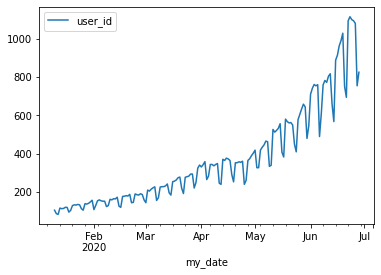

In [7]:
registrations.plot()

In [8]:
registrations_moving_avg= registrations.rolling(window=10).mean()

<AxesSubplot:xlabel='my_date'>

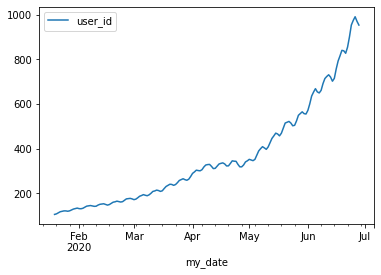

In [9]:
registrations_moving_avg.plot()

In [11]:
registrations.describe()

,user_id
count,171.000000
mean,368.678363
std,253.223074
min,82.000000
25%,170.500000
50%,290.000000
75%,500.500000
max,1115.000000


In [12]:
dates = registrations.index.to_julian_date()

In [13]:
y = np.asarray(registrations['user_id']).reshape(-1,1)
x = np.asarray(dates).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred= reg.predict(x_test)

In [16]:
reg.coef_

array([[4.57113919]])

In [17]:
reg.intercept_

array([-11239806.20032862])

In [18]:
r2_score(y_test, y_pred)

0.8378737390335265

In [19]:
rest_year=pd.date_range(start="2020-06-29",end="2020-12-31")

In [20]:
needed_dates= rest_year.to_julian_date()

In [21]:
needed_dates = np.asarray(needed_dates).reshape(-1,1)

In [22]:
rest_year_predictions = reg.predict(needed_dates).reshape(186)

In [23]:
needed_predictions = pd.DataFrame(np.array([rest_year,rest_year_predictions])).T

In [24]:
needed_predictions[0] = needed_predictions[0].dt.normalize()

In [25]:
needed_predictions.columns = ['future_dates', 'registration_predicts']

In [26]:
needed_predictions.set_index('future_dates')

,registration_predicts
future_dates,
2020-06-29,759.915
2020-06-30,764.486
2020-07-01,769.057
2020-07-02,773.629
2020-07-03,778.2
2020-07-04,782.771
2020-07-05,787.342
2020-07-06,791.913
2020-07-07,796.484


<AxesSubplot:xlabel='future_dates'>

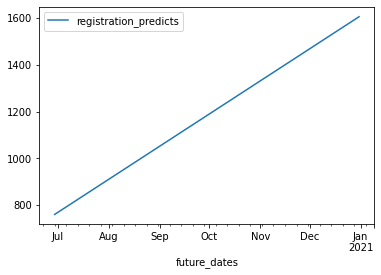

In [29]:
needed_predictions.plot(x='future_dates', y='registration_predicts')